# Ola Bike Ride Request Demand Forecast

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
from datetime import date
import calendar

In [4]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [7]:
train_df = pd.read_csv('train.csv')

In [8]:
train_df

datetime  season  holiday  workingday  weather   temp   atemp  \
0      01-01-2011 00:00       1        0           0        1   9.84  14.395   
1      01-01-2011 01:00       1        0           0        1   9.02  13.635   
2      01-01-2011 02:00       1        0           0        1   9.02  13.635   
3      01-01-2011 03:00       1        0           0        1   9.84  14.395   
4      01-01-2011 04:00       1        0           0        1   9.84  14.395   
...                 ...     ...      ...         ...      ...    ...     ...   
10881  19-12-2012 19:00       4        0           1        1  15.58  19.695   
10882  19-12-2012 20:00       4        0           1        1  14.76  17.425   
10883  19-12-2012 21:00       4        0           1        1  13.94  15.910   
10884  19-12-2012 22:00       4        0           1        1  13.94  17.425   
10885  19-12-2012 23:00       4        0           1        1  13.12  16.665   

       humidity  windspeed  casual  registered  count  
0            81     0.0000       3          13     16  
1            80     0.0000       8          32     40  
2            80     0.0000       5          27     32  
3            75     0.0000       3          10     13  
4            75     0.0000       0           1      1  
...         ...        ...     ...         ...    ...  
10881        50    26.0027       7         329    336  
10882        57    15.0013      10         231    241  
10883        61    15.0013       4         164    168  
10884        61     6.0032      12         117    129  
10885        66     8.9981       4          84     88  

[10886 rows x 12 columns]

In [9]:
train_df.shape

(10886, 12)

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### Dealing with Null Values

In [11]:
train_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [12]:
train_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [13]:
train_df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

### Changing into datetime format

In [16]:
# Define your function to convert a column to datetime
def change_into_datetime(col):
    train_df[col] = pd.to_datetime(train_df[col], format="%d-%m-%Y %H:%M")

# Assuming `train_df` is your DataFrame
# Call the function for the 'datetime' column
change_into_datetime('datetime')

# Check if the conversion is successful
print(train_df['datetime'].head())


0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
Name: datetime, dtype: datetime64[ns]


In [17]:
train_df['year'] = train_df['datetime'].dt.year
train_df['month'] = train_df['datetime'].dt.month
train_df['date'] = train_df['datetime'].dt.date
train_df['hour'] = train_df['datetime'].dt.hour
train_df['day of the week'] = train_df['datetime'].dt.dayofweek

In [19]:
train_df['year'].unique()

array([2011, 2012], dtype=int32)

### Mapping key values to Dictionary

In [20]:
dict = {2011 :'1', 2012 :'2'}

In [21]:
train_df['year'] = train_df['year'].map(dict)
train_df['year'].unique()

array(['1', '2'], dtype=object)

In [22]:
train_df.drop('datetime',axis=1,inplace=True)

In [23]:
train_df.head()

season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   casual  registered  count year  month        date  hour  day of the week  
0       3          13     16    1      1  2011-01-01     0                5  
1       8          32     40    1      1  2011-01-01     1                5  
2       5          27     32    1      1  2011-01-01     2                5  
3       3          10     13    1      1  2011-01-01     3                5  
4       0           1      1    1      1  2011-01-01     4                5

## Performing Exploratory Data Analysis

In [24]:
train_df.drop('count',axis=1).describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              month          hour  day of the week  
count  10886.000000  10886.000000     10886.000000  
mean       6.521495     11.541613         3.013963  
std        3.444373      6.915838         2.004585  
min        1.000000      0.000000         0.000000  
25%        4.000000      6.000000         1.000000  
50%        7.000000     12.000000         3.000000  
75%       10.000000     18.000000         5.000000  
max       12.000000     23.000000         6.000000

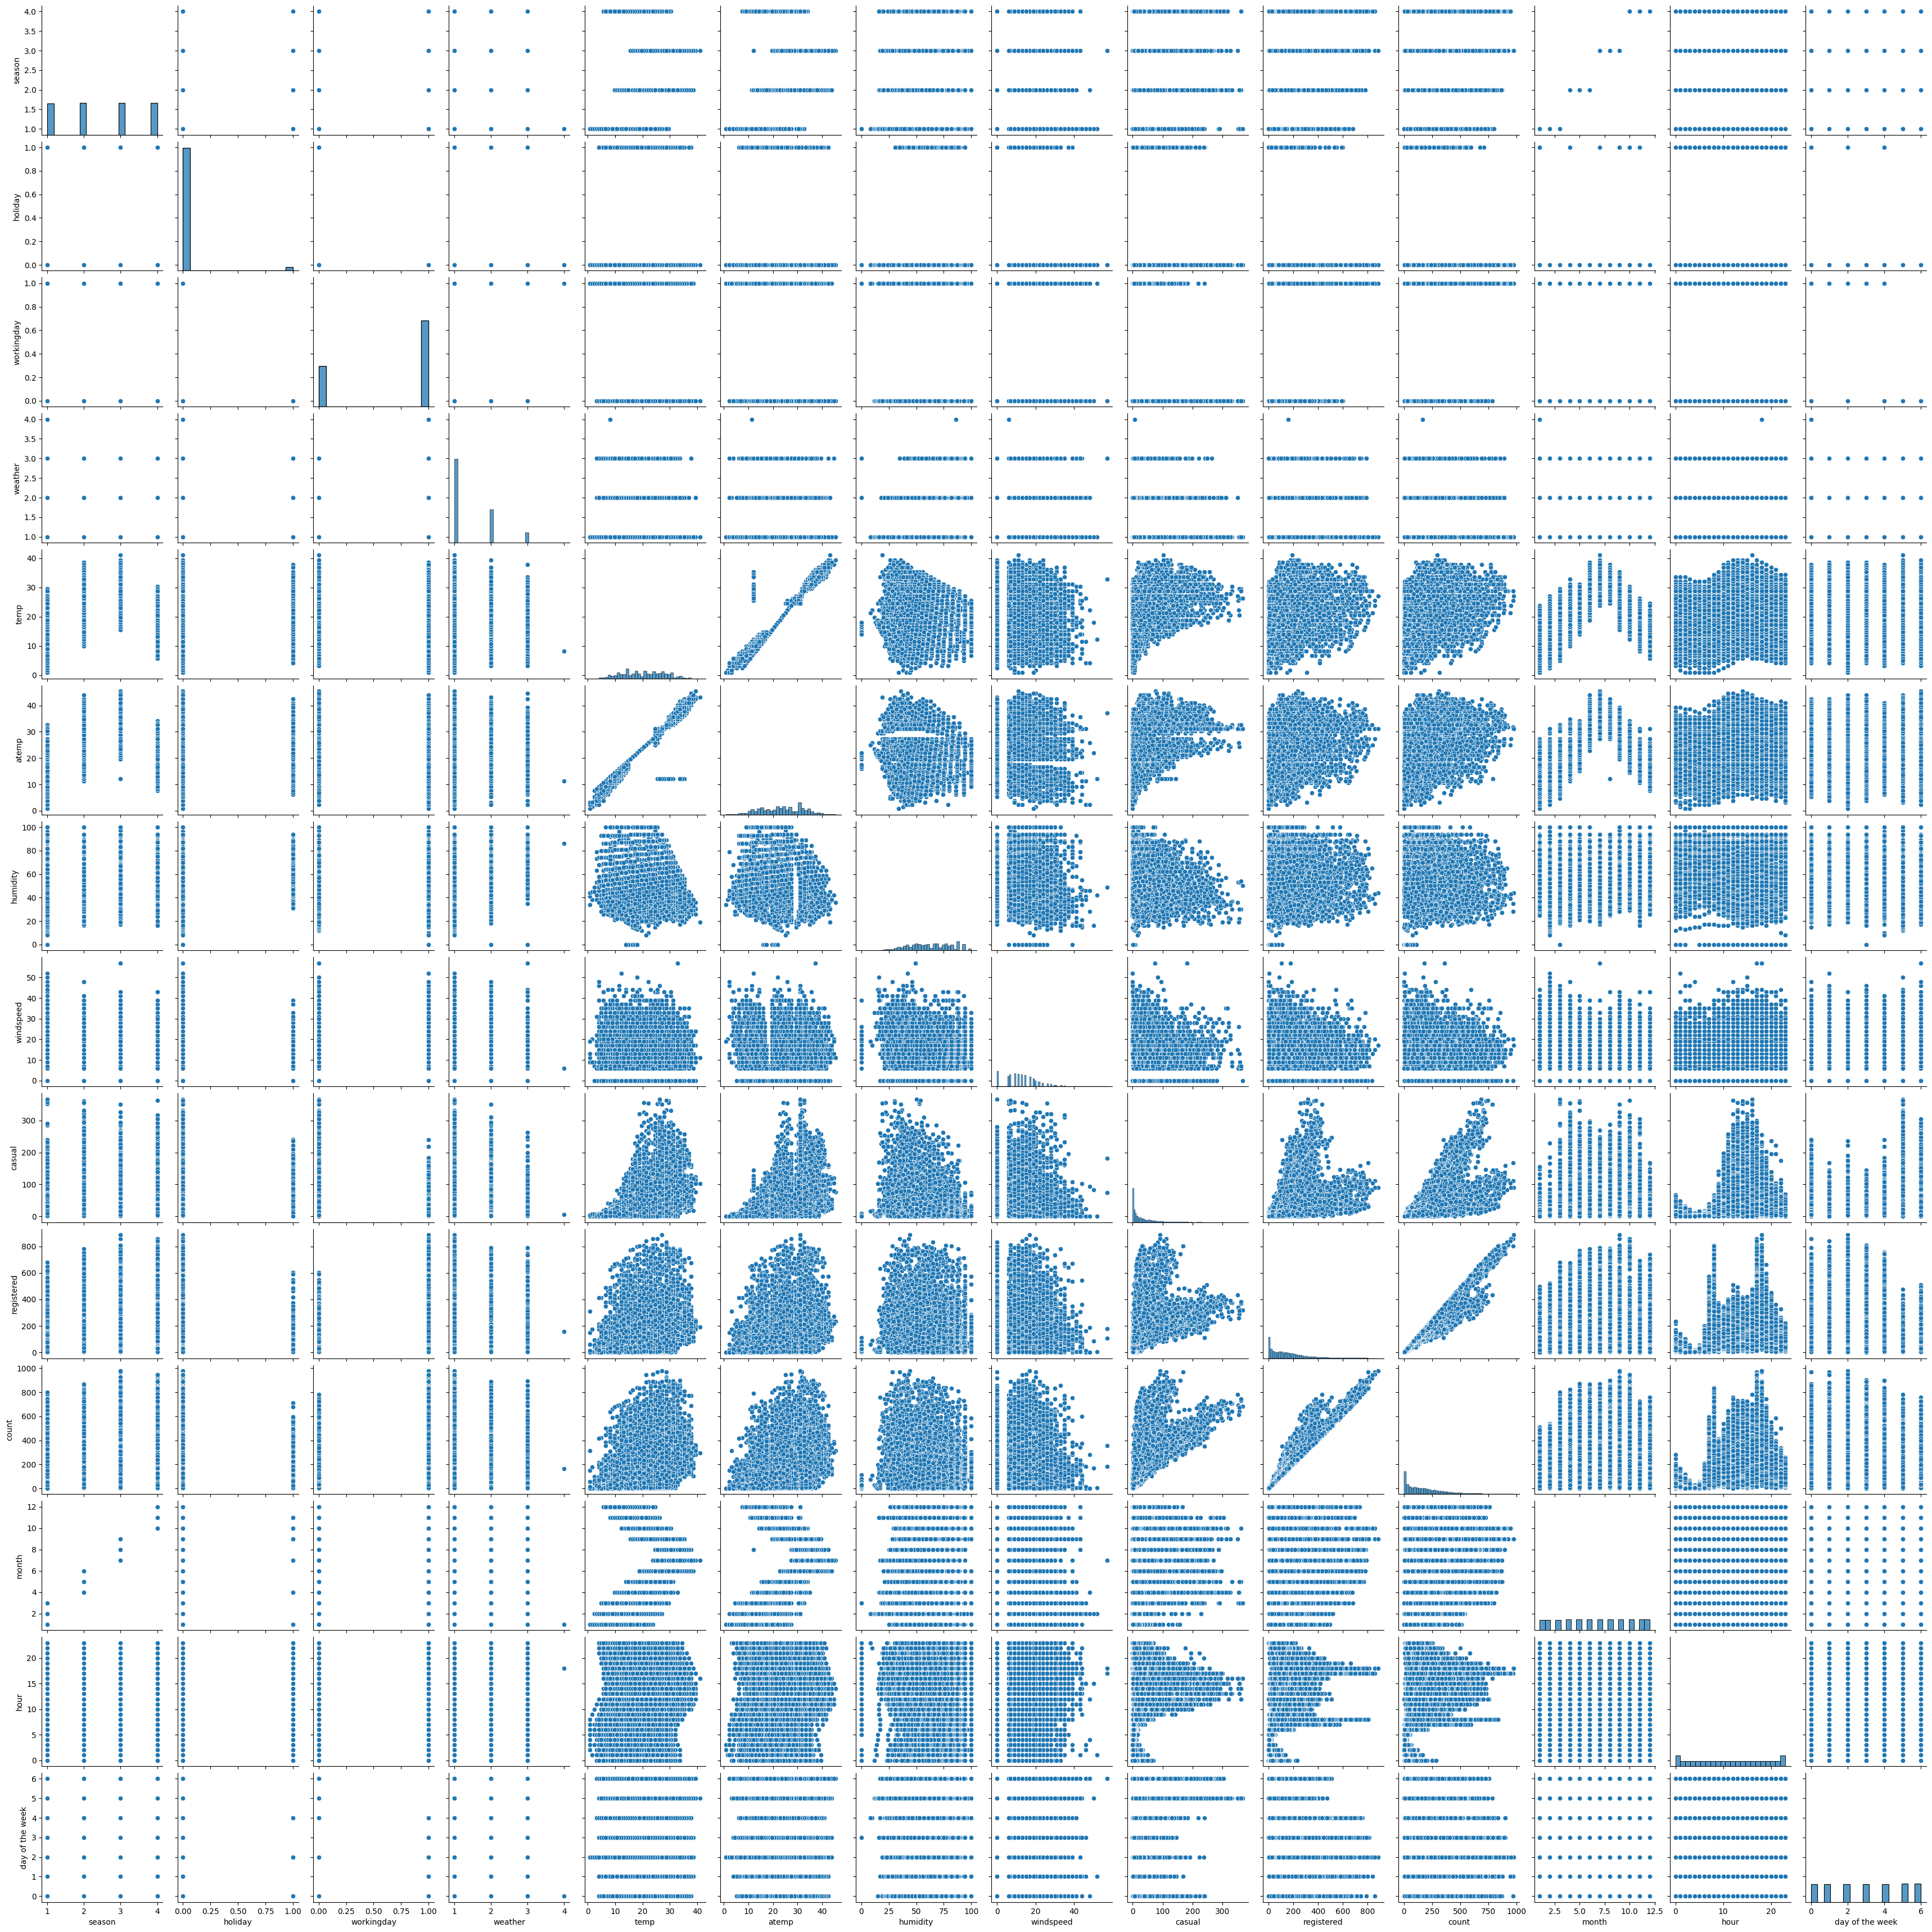

In [25]:
sns.pairplot(train_df);

### Distribution of target variable 'count'

<ipython-input-26-e8663e0fe90b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['count']);


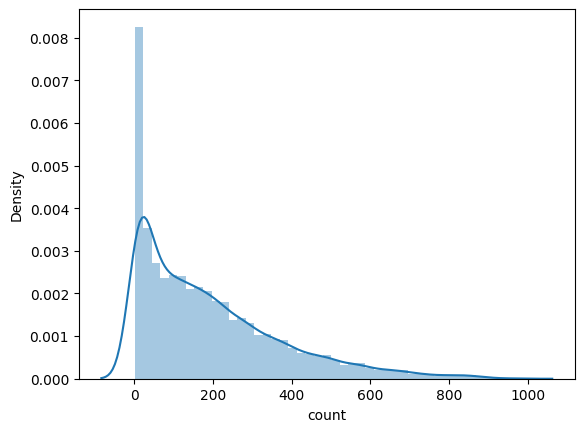

In [26]:
sns.distplot(train_df['count']);

Inference - The target variable is right skewed and hence we have to take the log of the variable to check if the distribution becomes normal or not.

<ipython-input-27-1b80ba243613>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(train_df['count']));


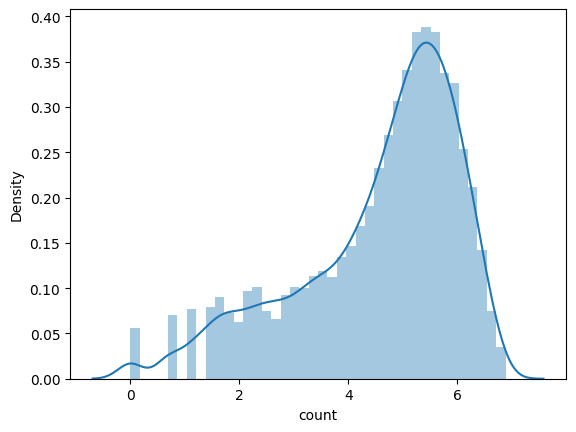

In [27]:
sns.distplot(np.log(train_df['count']));

### Visualizing the Demand using multiple variables

###  Demand per day of the week

<ipython-input-28-0dfdae1a1fbd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train_df, x = 'day of the week', y = 'count', palette='rainbow');


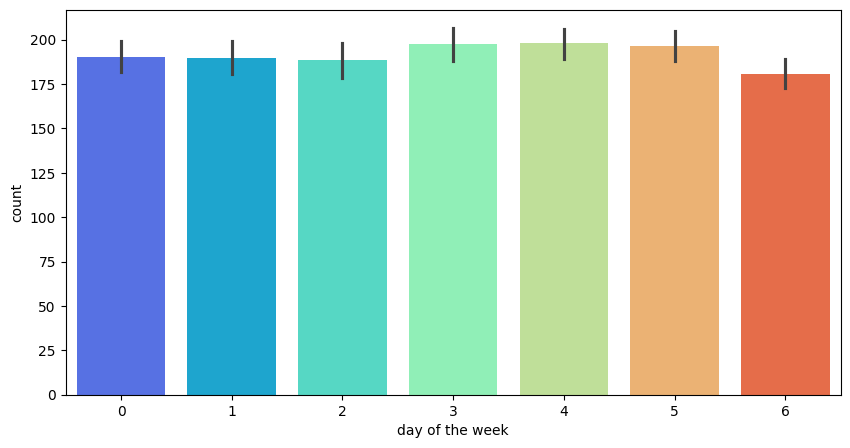

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(data=train_df, x = 'day of the week', y = 'count', palette='rainbow');

Inference -  demand of bike rentals were almost same for each day of the week. So this feature will not be useful in predicting the demand therefore we will have to drop this feature.

### Demand per month

<ipython-input-29-1c8e37705eb7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train_df, x='month', y = 'count', palette = 'rainbow');


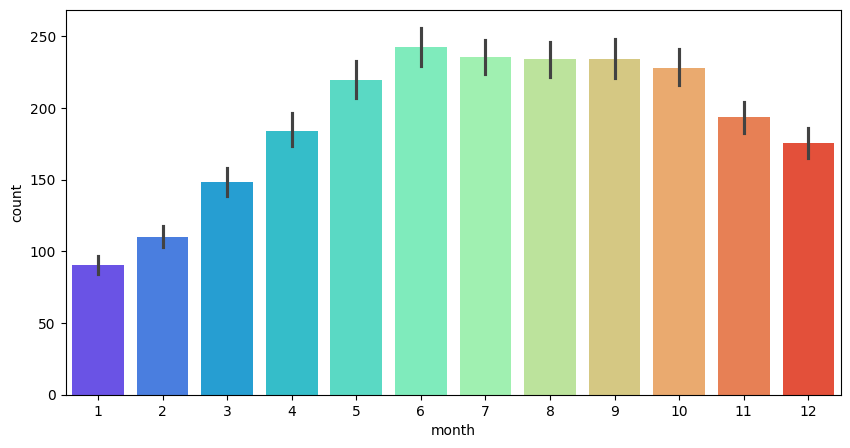

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(data=train_df, x='month', y = 'count', palette = 'rainbow');

Inference - Demand for bike rentals was high during the months of summer and the demand drops during the months of winter.

### Year Month Demand

In [30]:
group_year_month = train_df.groupby(['year','month'])
average_year_month = group_year_month['count'].mean()

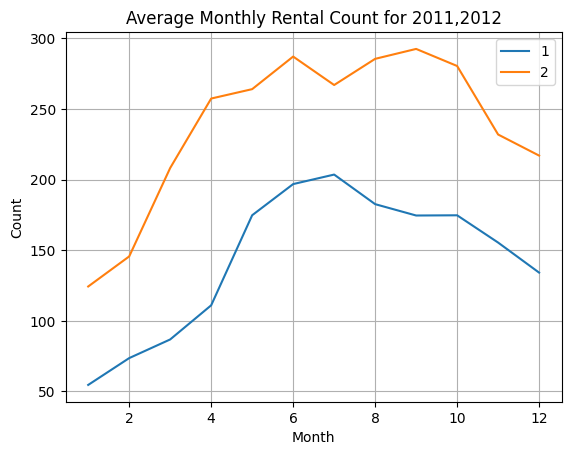

In [31]:
for year in average_year_month.index.levels[0]:
    plt.plot(average_year_month[year].index,average_year_month[year],label=year)

plt.legend()
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(True)
plt.title('Average Monthly Rental Count for 2011,2012')
plt.show()

### Demand per hour

<ipython-input-32-6c02bc002582>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = train_df, x = 'hour', y = 'count', palette = 'rainbow');


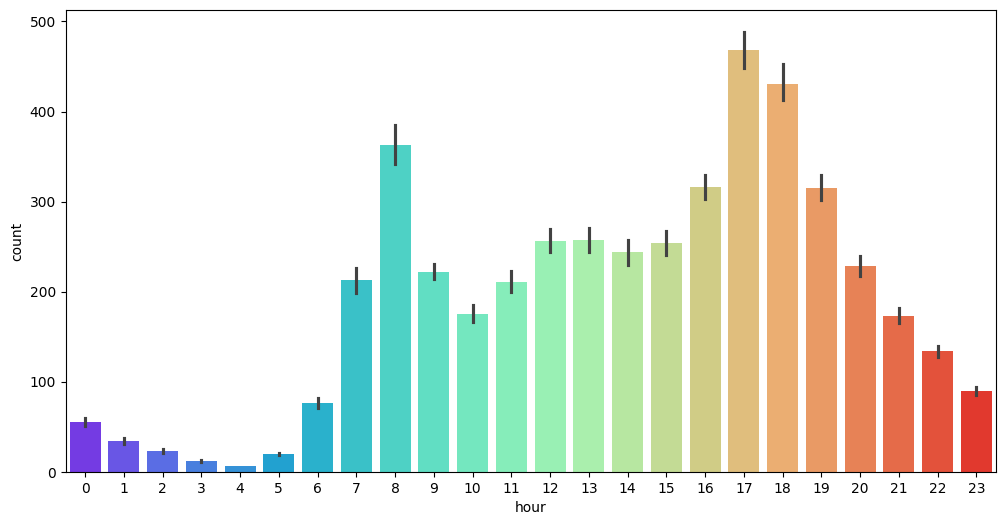

In [32]:
plt.figure(figsize=(12,6))
sns.barplot(data = train_df, x = 'hour', y = 'count', palette = 'rainbow');

Inference - Demand for bike rentals were high during the office hours and it was low during the non-working hours as it might be possible that most of the people use the bike rental services to reach their office premises or leave their premises during these hours.

### Year Hour Demand

In [33]:
group_year_hour = train_df.groupby(['year','hour'])
average_year_hour = group_year_hour['count'].mean()

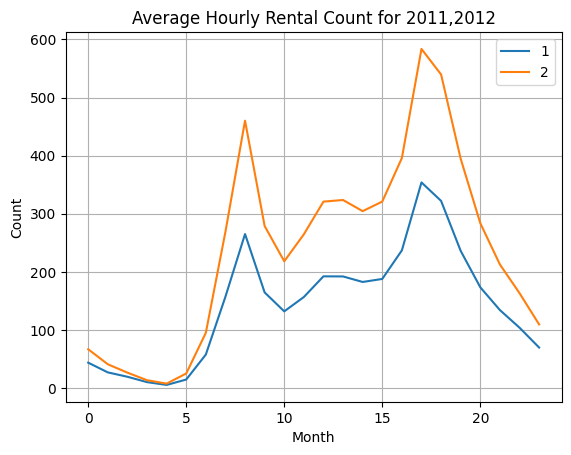

In [34]:
for year in average_year_hour.index.levels[0]:
    plt.plot(average_year_hour[year].index,average_year_hour[year],label=year)

plt.legend()
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(True)
plt.title('Average Hourly Rental Count for 2011,2012')
plt.show()

### Average Hourly Count

In [35]:
group_hour = train_df.groupby(['hour'])
average_by_hour = group_hour['count'].mean()

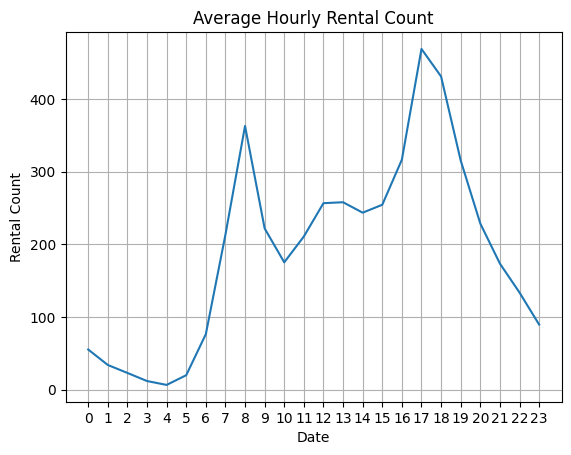

In [36]:
plt.plot(average_by_hour.index,average_by_hour)
plt.xlabel('Date')
plt.ylabel('Rental Count')
plt.xticks(np.arange(24))
plt.grid(True)
plt.title('Average Hourly Rental Count')
plt.show()

### Demand per season

<ipython-input-37-db3df382fe22>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = train_df, x = 'season', y = 'count', palette = 'rainbow');


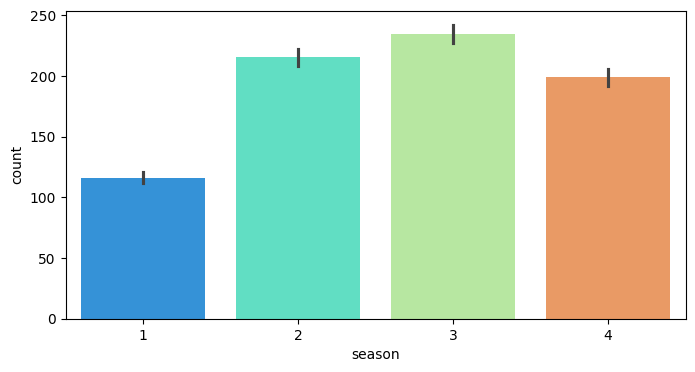

In [37]:
plt.figure(figsize = (8,4))
sns.barplot(data = train_df, x = 'season', y = 'count', palette = 'rainbow');

Inference - Demand was high during the summer and fall seasons while it drops during winter and spring season as the weather during these seasons might not be suitable for bike rentals.

### Demand as per holidays

<ipython-input-38-fd7e44144431>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = train_df, x = 'holiday', y = 'count', palette = 'rainbow');


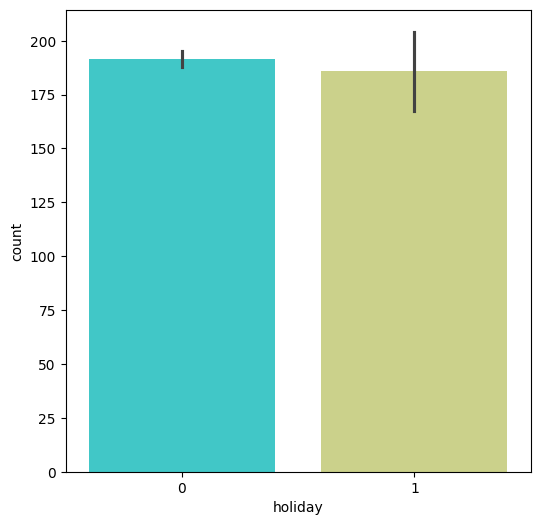

In [38]:
plt.figure(figsize=(6,6))
sns.barplot(data = train_df, x = 'holiday', y = 'count', palette = 'rainbow');

Inference - Demand was high during working days and low during holidays.

### Demand on working days

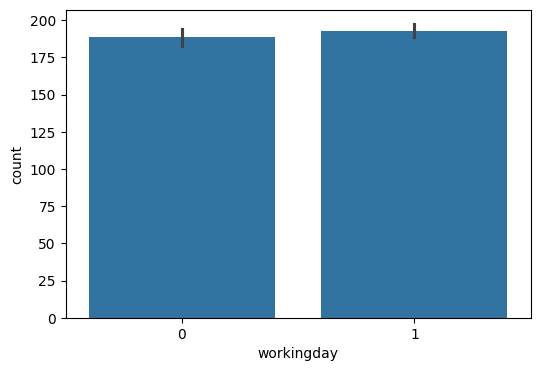

In [39]:
plt.figure(figsize=(6,4))
sns.barplot(data = train_df, x = 'workingday', y = 'count');

Inference - It doesn't affect the demand much as it remains almost the same both the time, therefore we will have to drop this column.

### Working day Hour Demand

In [40]:
group_workingday_hour = train_df.groupby(['workingday','hour'])
average_workingday_hour = group_workingday_hour['count'].mean()

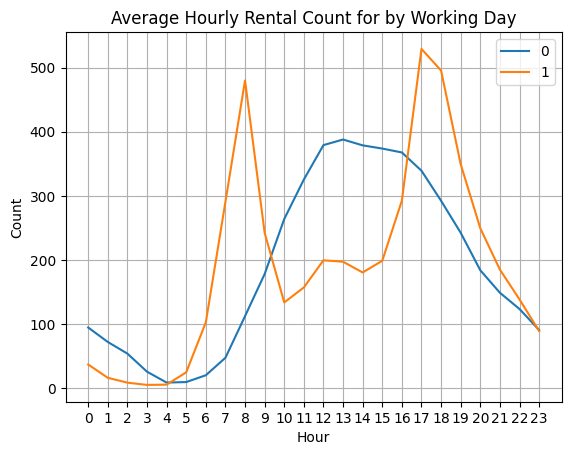

In [41]:
for workingday in average_workingday_hour.index.levels[0]:
    plt.plot(average_workingday_hour[workingday].index,average_workingday_hour[workingday],label=workingday)

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(np.arange(24))
plt.grid(True)
plt.title('Average Hourly Rental Count for by Working Day')
plt.show()

### Visualization of the continuous varibles using Histogram

###### Continuous features - temp, atemp, humidity, windspeed, count

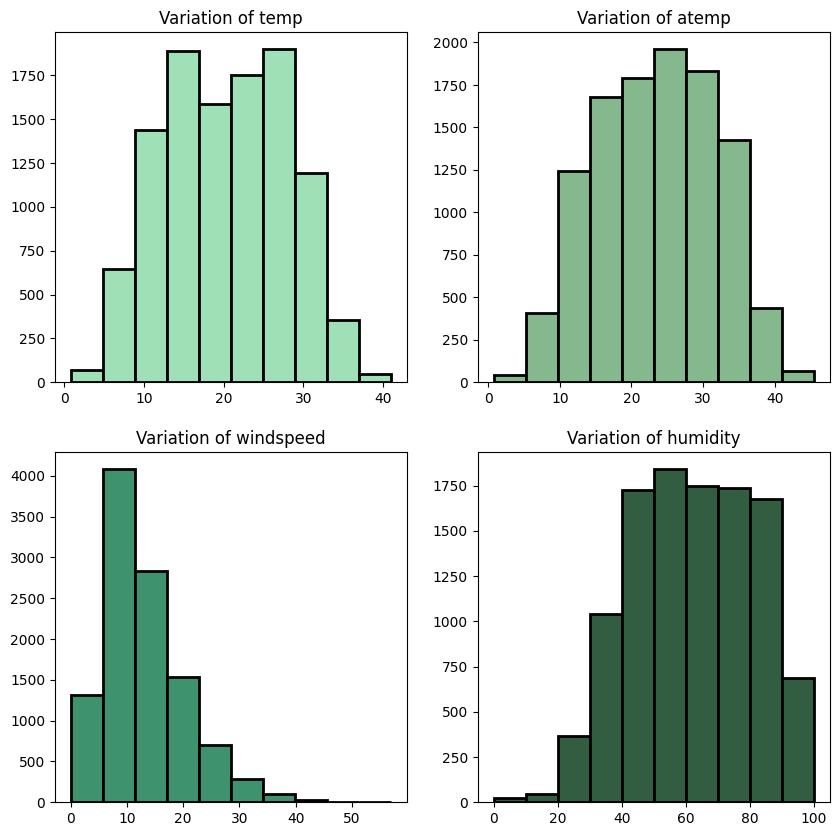

In [42]:
train_df.temp.unique()
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temp",data=train_df,edgecolor="black",linewidth=2,color='#a0e0b6')
axes[0,0].set_title("Variation of temp")
axes[0,1].hist(x="atemp",data=train_df,edgecolor="black",linewidth=2,color='#85b98d')
axes[0,1].set_title("Variation of atemp")
axes[1,0].hist(x="windspeed",data=train_df,edgecolor="black",linewidth=2,color='#3e936e')
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="humidity",data=train_df,edgecolor="black",linewidth=2,color='#335d40')
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)

### Temperature vs Demand

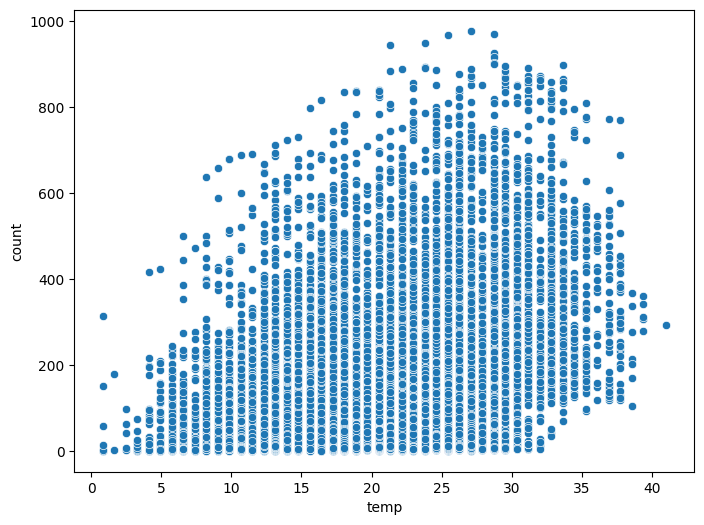

In [43]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = train_df, x = 'temp', y = 'count');

##### Since this is hard to visualze. a better way is to convert the 'temp' variable into intervals or so called bins and then treat it like a discrete variable.

[1 2 3 0 4 5 6 7 8]


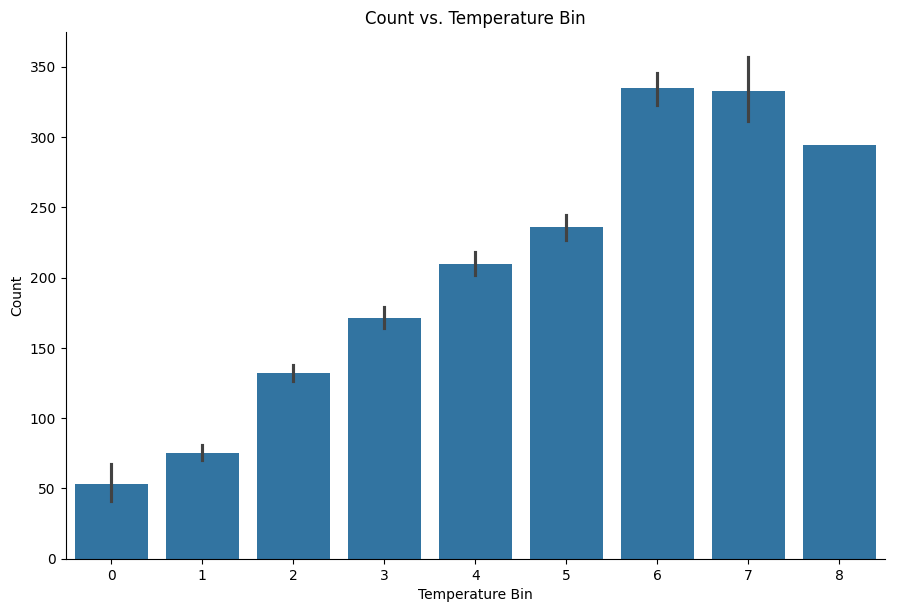

In [45]:

# Assuming train_df is your DataFrame
viz_df = train_df.copy()

# Describe the 'temp' column
viz_df['temp'].describe()

# Create a new column 'temp_bin' with discrete values of 'temp'
viz_df['temp_bin'] = np.floor(viz_df['temp'] / 5).astype(int)

# Check the unique values in 'temp_bin'
print(viz_df['temp_bin'].unique())

# Visualize 'temp_bin' against 'count' using seaborn catplot
sns.catplot(x="temp_bin", y="count", data=viz_df, kind='bar', height=6, aspect=1.5)
plt.xlabel('Temperature Bin')
plt.ylabel('Count')
plt.title('Count vs. Temperature Bin')
plt.show()

Inference - The demand is highest for bins 6 and 7 which is about tempearure  30-35(bin 6) and 35-40 (bin 7).

### Demand vs aTemp

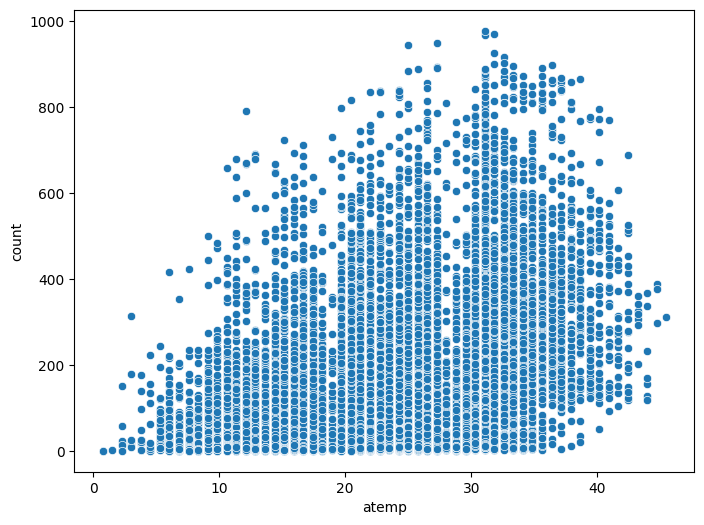

In [46]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = train_df, x = 'atemp', y = 'count');

count    10886.000000
mean        23.655084
std          8.474601
min          0.760000
25%         16.665000
50%         24.240000
75%         31.060000
max         45.455000
Name: atemp, dtype: float64
[2 3 4 1 0 5 6 7 8 9]


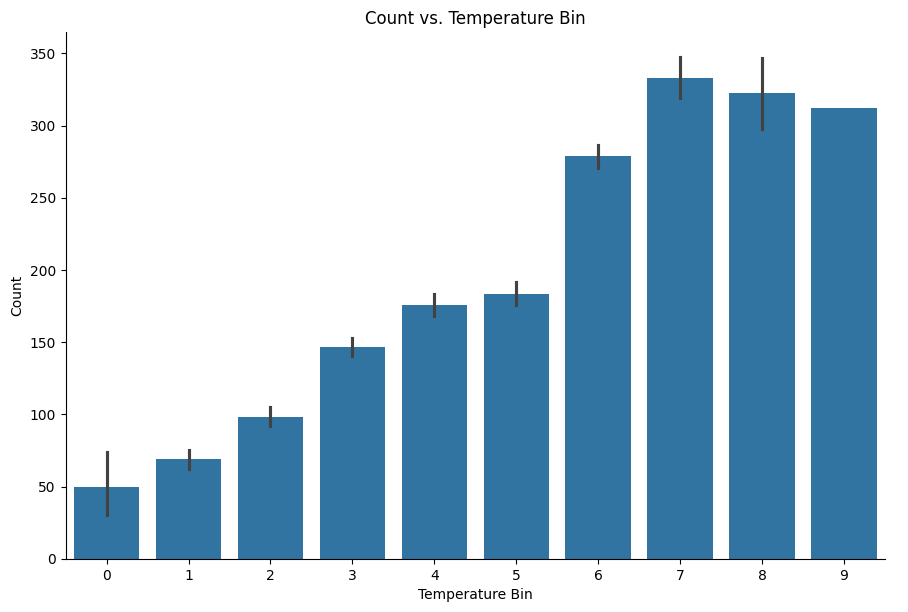

In [48]:
# Assuming train_df is your DataFrame
viz_df = train_df.copy()

# Describe the 'atemp' column
print(viz_df['atemp'].describe())

# Create a new column 'temp_bin' with discrete values of 'atemp'
viz_df['temp_bin'] = np.floor(viz_df['atemp'] / 5).astype(int)

# Check the unique values in 'temp_bin'
print(viz_df['temp_bin'].unique())

# Visualize 'temp_bin' against 'count' using seaborn catplot
sns.catplot(x="temp_bin", y="count", data=viz_df, kind='bar', height=6, aspect=1.5)
plt.xlabel('Temperature Bin')
plt.ylabel('Count')
plt.title('Count vs. Temperature Bin')
plt.show()

##### Inference  - We can see that this plot is almost similar to the previous plot of temperature and demand which means there is a high correlation between temp and atemp features.

### Humidity vs Demand

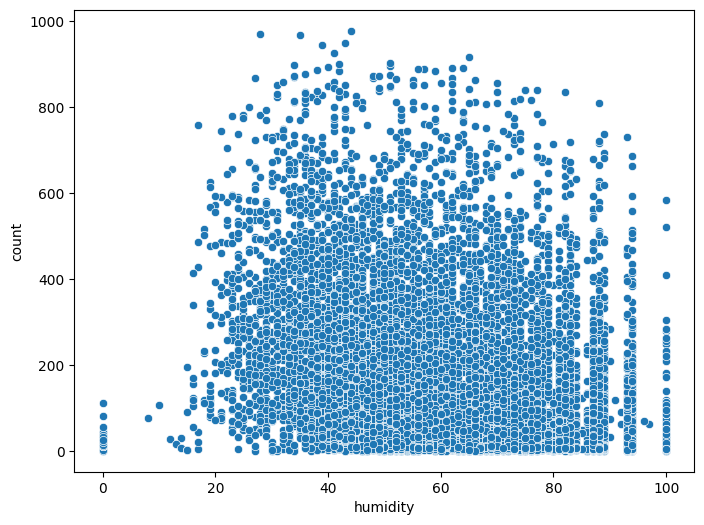

In [49]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = train_df, x = 'humidity', y='count');

count    10886.000000
mean        61.886460
std         19.245033
min          0.000000
25%         47.000000
50%         62.000000
75%         77.000000
max        100.000000
Name: humidity, dtype: float64
[ 8  7  9 10  6  5  4  3  2  1  0]


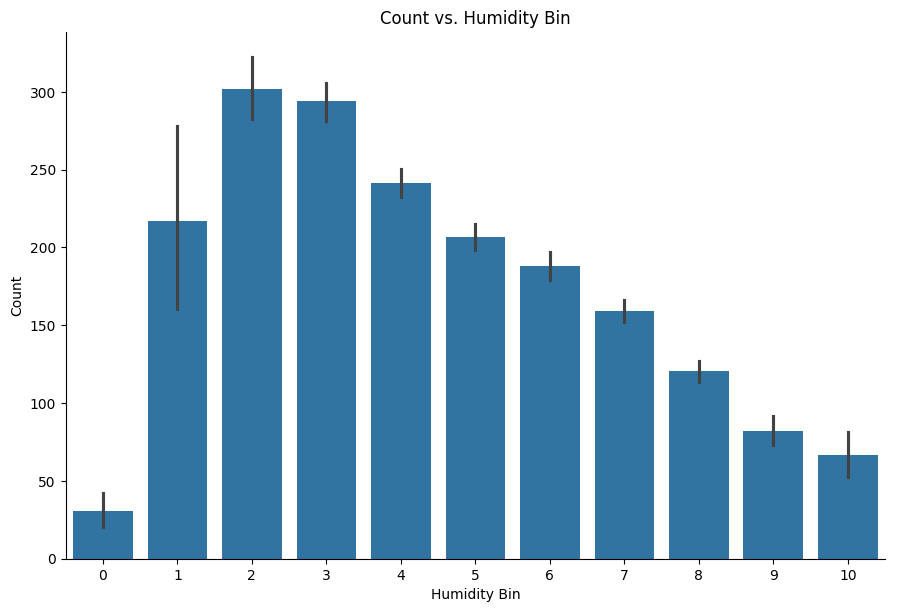

In [51]:
# Assuming train_df is your DataFrame
viz_df = train_df.copy()

# Describe the 'humidity' column
print(viz_df['humidity'].describe())

# Create a new column 'temp_bin' with discrete values of 'humidity'
viz_df['temp_bin'] = np.floor(viz_df['humidity'] / 10).astype(int)

# Check the unique values in 'temp_bin'
print(viz_df['temp_bin'].unique())

# Visualize 'temp_bin' against 'count' using seaborn catplot
sns.catplot(x="temp_bin", y="count", data=viz_df, kind='bar', height=6, aspect=1.5)
plt.xlabel('Humidity Bin')
plt.ylabel('Count')
plt.title('Count vs. Humidity Bin')
plt.show()

Inference - Humidity is not much correlated to Demand

### Windspeed vs Demand

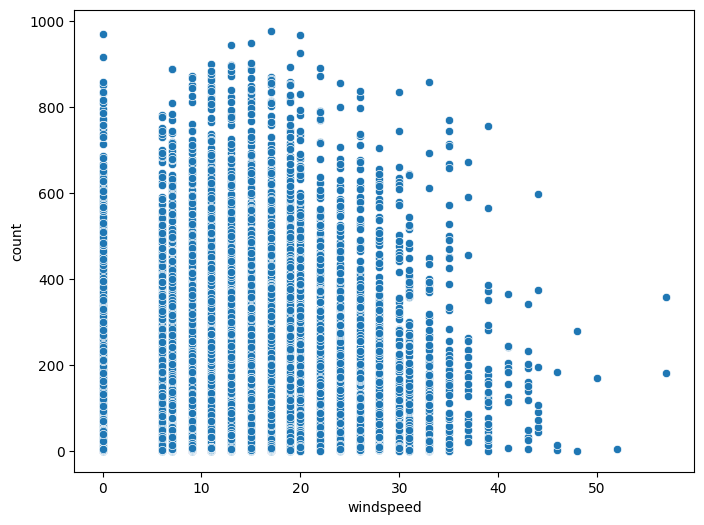

In [52]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = train_df, x = 'windspeed', y='count');

count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64
[ 0  1  3  2  4  6  5  7  8 10  9 11]


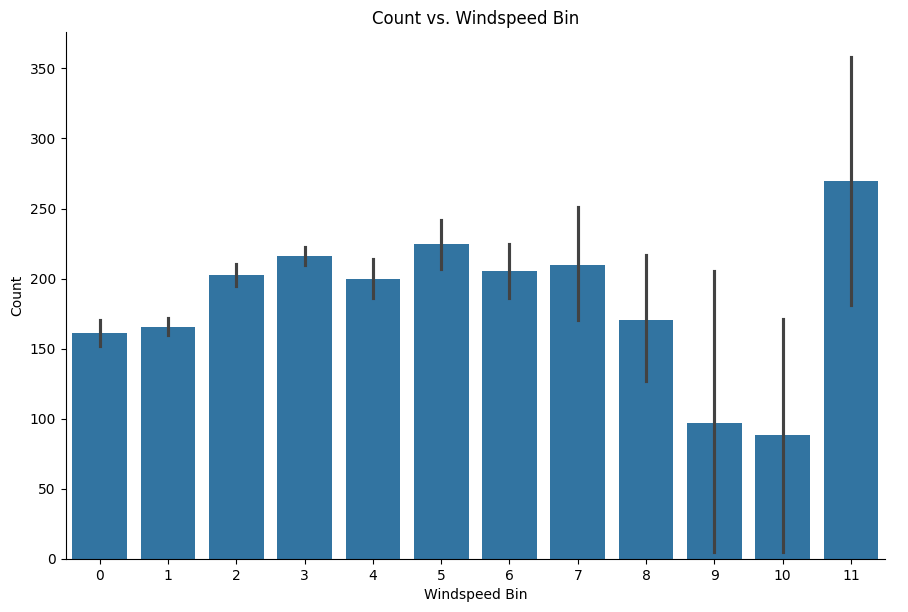

In [53]:
# Assuming train_df is your DataFrame
viz_df = train_df.copy()

# Describe the 'windspeed' column
print(viz_df['windspeed'].describe())

# Create a new column 'temp_bin' with discrete values of 'windspeed'
viz_df['temp_bin'] = np.floor(viz_df['windspeed'] / 5).astype(int)

# Check the unique values in 'temp_bin'
print(viz_df['temp_bin'].unique())

# Visualize 'temp_bin' against 'count' using seaborn catplot
sns.catplot(x="temp_bin", y="count", data=viz_df, kind='bar', height=6, aspect=1.5)
plt.xlabel('Windspeed Bin')
plt.ylabel('Count')
plt.title('Count vs. Windspeed Bin')
plt.show()

Inference - Since windspeed has a very low correlation with the demand so it does not affect the demand much.

### Visualization of the Correlation Matrix of continuous features and understanding how it will affect the Target variable

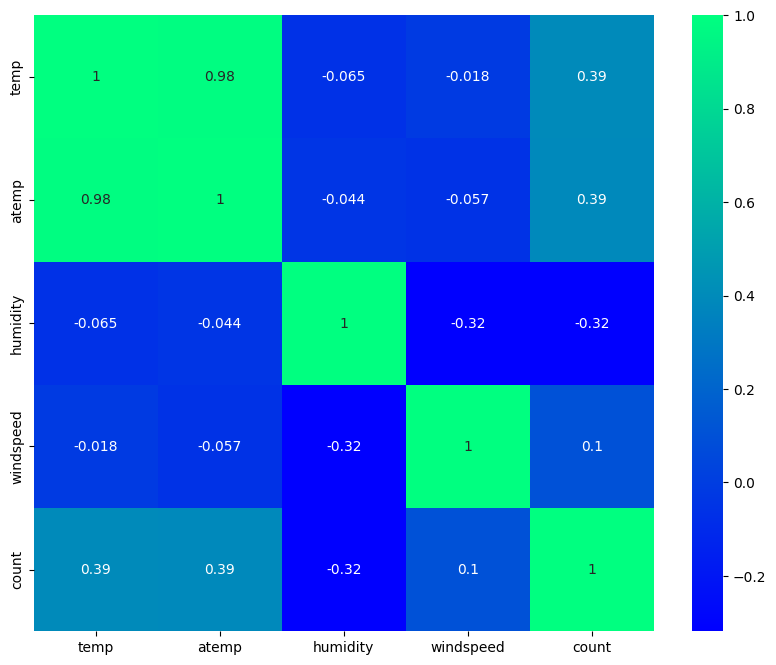

In [54]:
corrdata = train_df[["temp","atemp","humidity","windspeed","count"]]
corrmat = corrdata.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrmat, annot = True, cmap= 'winter');

### Visualization of the Correlation Matrix of all the independent features

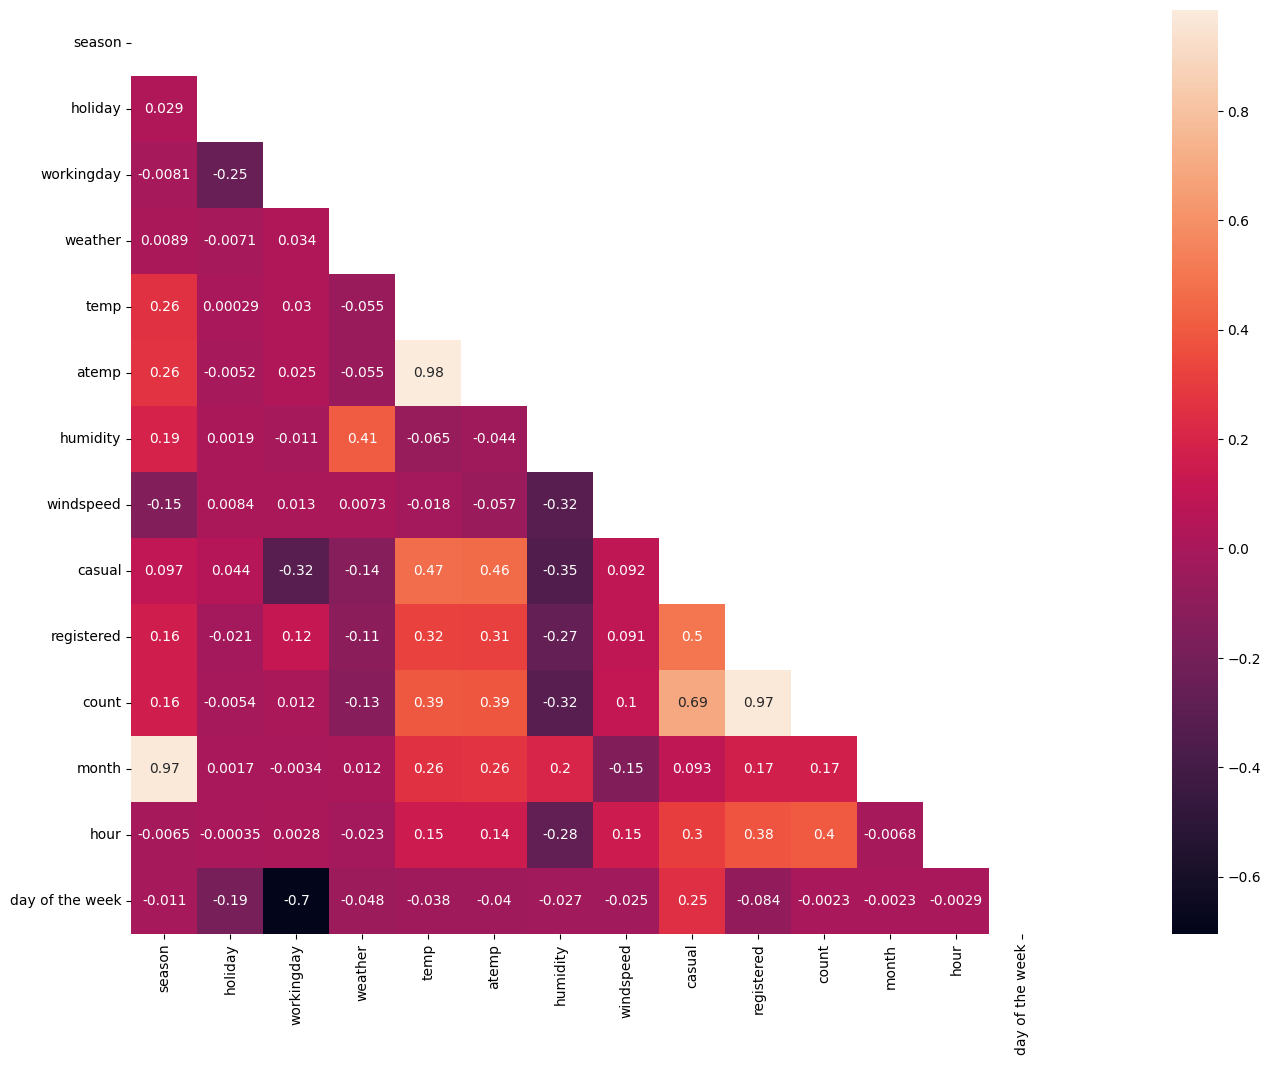

In [56]:

# Filter out non-numeric columns
numeric_df = train_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
cor_mat = numeric_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(cor_mat, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(30, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor_mat, mask=mask, square=True, annot=True, cbar=True, ax=ax)

# Display the heatmap
plt.show()

## Data Preprocessing

In [57]:
train_df

season  holiday  workingday  weather   temp   atemp  humidity  \
0           1        0           0        1   9.84  14.395        81   
1           1        0           0        1   9.02  13.635        80   
2           1        0           0        1   9.02  13.635        80   
3           1        0           0        1   9.84  14.395        75   
4           1        0           0        1   9.84  14.395        75   
...       ...      ...         ...      ...    ...     ...       ...   
10881       4        0           1        1  15.58  19.695        50   
10882       4        0           1        1  14.76  17.425        57   
10883       4        0           1        1  13.94  15.910        61   
10884       4        0           1        1  13.94  17.425        61   
10885       4        0           1        1  13.12  16.665        66   

       windspeed  casual  registered  count year  month        date  hour  \
0         0.0000       3          13     16    1      1  2011-01-01     0   
1         0.0000       8          32     40    1      1  2011-01-01     1   
2         0.0000       5          27     32    1      1  2011-01-01     2   
3         0.0000       3          10     13    1      1  2011-01-01     3   
4         0.0000       0           1      1    1      1  2011-01-01     4   
...          ...     ...         ...    ...  ...    ...         ...   ...   
10881    26.0027       7         329    336    2     12  2012-12-19    19   
10882    15.0013      10         231    241    2     12  2012-12-19    20   
10883    15.0013       4         164    168    2     12  2012-12-19    21   
10884     6.0032      12         117    129    2     12  2012-12-19    22   
10885     8.9981       4          84     88    2     12  2012-12-19    23   

       day of the week  
0                    5  
1                    5  
2                    5  
3                    5  
4                    5  
...                ...  
10881                2  
10882                2  
10883                2  
10884                2  
10885                2  

[10886 rows x 16 columns]

In [58]:
train_df["year"] = pd.to_numeric(train_df["year"])

### Performing One Hot Encoding on categorical features

In [59]:
season = pd.get_dummies(train_df['season'],prefix='season',drop_first=True)
weather = pd.get_dummies(train_df['weather'],prefix='weather',drop_first=True)
holiday = pd.get_dummies(train_df['holiday'],prefix='holiday',drop_first=True)
month = pd.get_dummies(train_df['month'],prefix='month',drop_first=True)
hour = pd.get_dummies(train_df['hour'],prefix='hour',drop_first=True)
train_df = pd.concat([train_df,season,weather,holiday,month,hour],axis=1)
train_df.drop(['season','weather','holiday','month','hour'], axis=1,inplace=True)

In [60]:
pd.set_option('display.max_columns',52)
train_df.head()

workingday  temp   atemp  humidity  windspeed  casual  registered  count  \
0           0  9.84  14.395        81        0.0       3          13     16   
1           0  9.02  13.635        80        0.0       8          32     40   
2           0  9.02  13.635        80        0.0       5          27     32   
3           0  9.84  14.395        75        0.0       3          10     13   
4           0  9.84  14.395        75        0.0       0           1      1   

   year        date  day of the week  season_2  season_3  season_4  weather_2  \
0     1  2011-01-01                5     False     False     False      False   
1     1  2011-01-01                5     False     False     False      False   
2     1  2011-01-01                5     False     False     False      False   
3     1  2011-01-01                5     False     False     False      False   
4     1  2011-01-01                5     False     False     False      False   

   weather_3  weather_4  holiday_1  month_2  month_3  month_4  month_5  \
0      False      False      False    False    False    False    False   
1      False      False      False    False    False    False    False   
2      False      False      False    False    False    False    False   
3      False      False      False    False    False    False    False   
4      False      False      False    False    False    False    False   

   month_6  month_7  month_8  month_9  month_10  month_11  month_12  hour_1  \
0    False    False    False    False     False     False     False   False   
1    False    False    False    False     False     False     False    True   
2    False    False    False    False     False     False     False   False   
3    False    False    False    False     False     False     False   False   
4    False    False    False    False     False     False     False   False   

   hour_2  hour_3  hour_4  hour_5  hour_6  hour_7  hour_8  hour_9  hour_10  \
0   False   False   False   False   False   False   False   False    False   
1   False   False   False   False   False   False   False   False    False   
2    True   False   False   False   False   False   False   False    False   
3   False    True   False   False   False   False   False   False    False   
4   False   False    True   False   False   False   False   False    False   

   hour_11  hour_12  hour_13  hour_14  hour_15  hour_16  hour_17  hour_18  \
0    False    False    False    False    False    False    False    False   
1    False    False    False    False    False    False    False    False   
2    False    False    False    False    False    False    False    False   
3    False    False    False    False    False    False    False    False   
4    False    False    False    False    False    False    False    False   

   hour_19  hour_20  hour_21  hour_22  hour_23  
0    False    False    False    False    False  
1    False    False    False    False    False  
2    False    False    False    False    False  
3    False    False    False    False    False  
4    False    False    False    False    False

### Dropping the features with low correlation

In [61]:
train_df.drop(['date','day of the week','year','windspeed','workingday'], axis=1, inplace=True)

In [62]:
train_df.head()

temp   atemp  humidity  casual  registered  count  season_2  season_3  \
0  9.84  14.395        81       3          13     16     False     False   
1  9.02  13.635        80       8          32     40     False     False   
2  9.02  13.635        80       5          27     32     False     False   
3  9.84  14.395        75       3          10     13     False     False   
4  9.84  14.395        75       0           1      1     False     False   

   season_4  weather_2  weather_3  weather_4  holiday_1  month_2  month_3  \
0     False      False      False      False      False    False    False   
1     False      False      False      False      False    False    False   
2     False      False      False      False      False    False    False   
3     False      False      False      False      False    False    False   
4     False      False      False      False      False    False    False   

   month_4  month_5  month_6  month_7  month_8  month_9  month_10  month_11  \
0    False    False    False    False    False    False     False     False   
1    False    False    False    False    False    False     False     False   
2    False    False    False    False    False    False     False     False   
3    False    False    False    False    False    False     False     False   
4    False    False    False    False    False    False     False     False   

   month_12  hour_1  hour_2  hour_3  hour_4  hour_5  hour_6  hour_7  hour_8  \
0     False   False   False   False   False   False   False   False   False   
1     False    True   False   False   False   False   False   False   False   
2     False   False    True   False   False   False   False   False   False   
3     False   False   False    True   False   False   False   False   False   
4     False   False   False   False    True   False   False   False   False   

   hour_9  hour_10  hour_11  hour_12  hour_13  hour_14  hour_15  hour_16  \
0   False    False    False    False    False    False    False    False   
1   False    False    False    False    False    False    False    False   
2   False    False    False    False    False    False    False    False   
3   False    False    False    False    False    False    False    False   
4   False    False    False    False    False    False    False    False   

   hour_17  hour_18  hour_19  hour_20  hour_21  hour_22  hour_23  
0    False    False    False    False    False    False    False  
1    False    False    False    False    False    False    False  
2    False    False    False    False    False    False    False  
3    False    False    False    False    False    False    False  
4    False    False    False    False    False    False    False

In [63]:
train_df.columns.to_series().groupby(train_df.dtypes).groups

{bool: ['season_2', 'season_3', 'season_4', 'weather_2', 'weather_3', 'weather_4', 'holiday_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23'], int64: ['humidity', 'casual', 'registered', 'count'], float64: ['temp', 'atemp']}

In [64]:
train_df.dtypes

temp          float64
atemp         float64
humidity        int64
casual          int64
registered      int64
count           int64
season_2         bool
season_3         bool
season_4         bool
weather_2        bool
weather_3        bool
weather_4        bool
holiday_1        bool
month_2          bool
month_3          bool
month_4          bool
month_5          bool
month_6          bool
month_7          bool
month_8          bool
month_9          bool
month_10         bool
month_11         bool
month_12         bool
hour_1           bool
hour_2           bool
hour_3           bool
hour_4           bool
hour_5           bool
hour_6           bool
hour_7           bool
hour_8           bool
hour_9           bool
hour_10          bool
hour_11          bool
hour_12          bool
hour_13          bool
hour_14          bool
hour_15          bool
hour_16          bool
hour_17          bool
hour_18          bool
hour_19          bool
hour_20          bool
hour_21          bool
hour_22   

### Visualization of the Correlation Matrix of the preprocessed data

<Axes: >

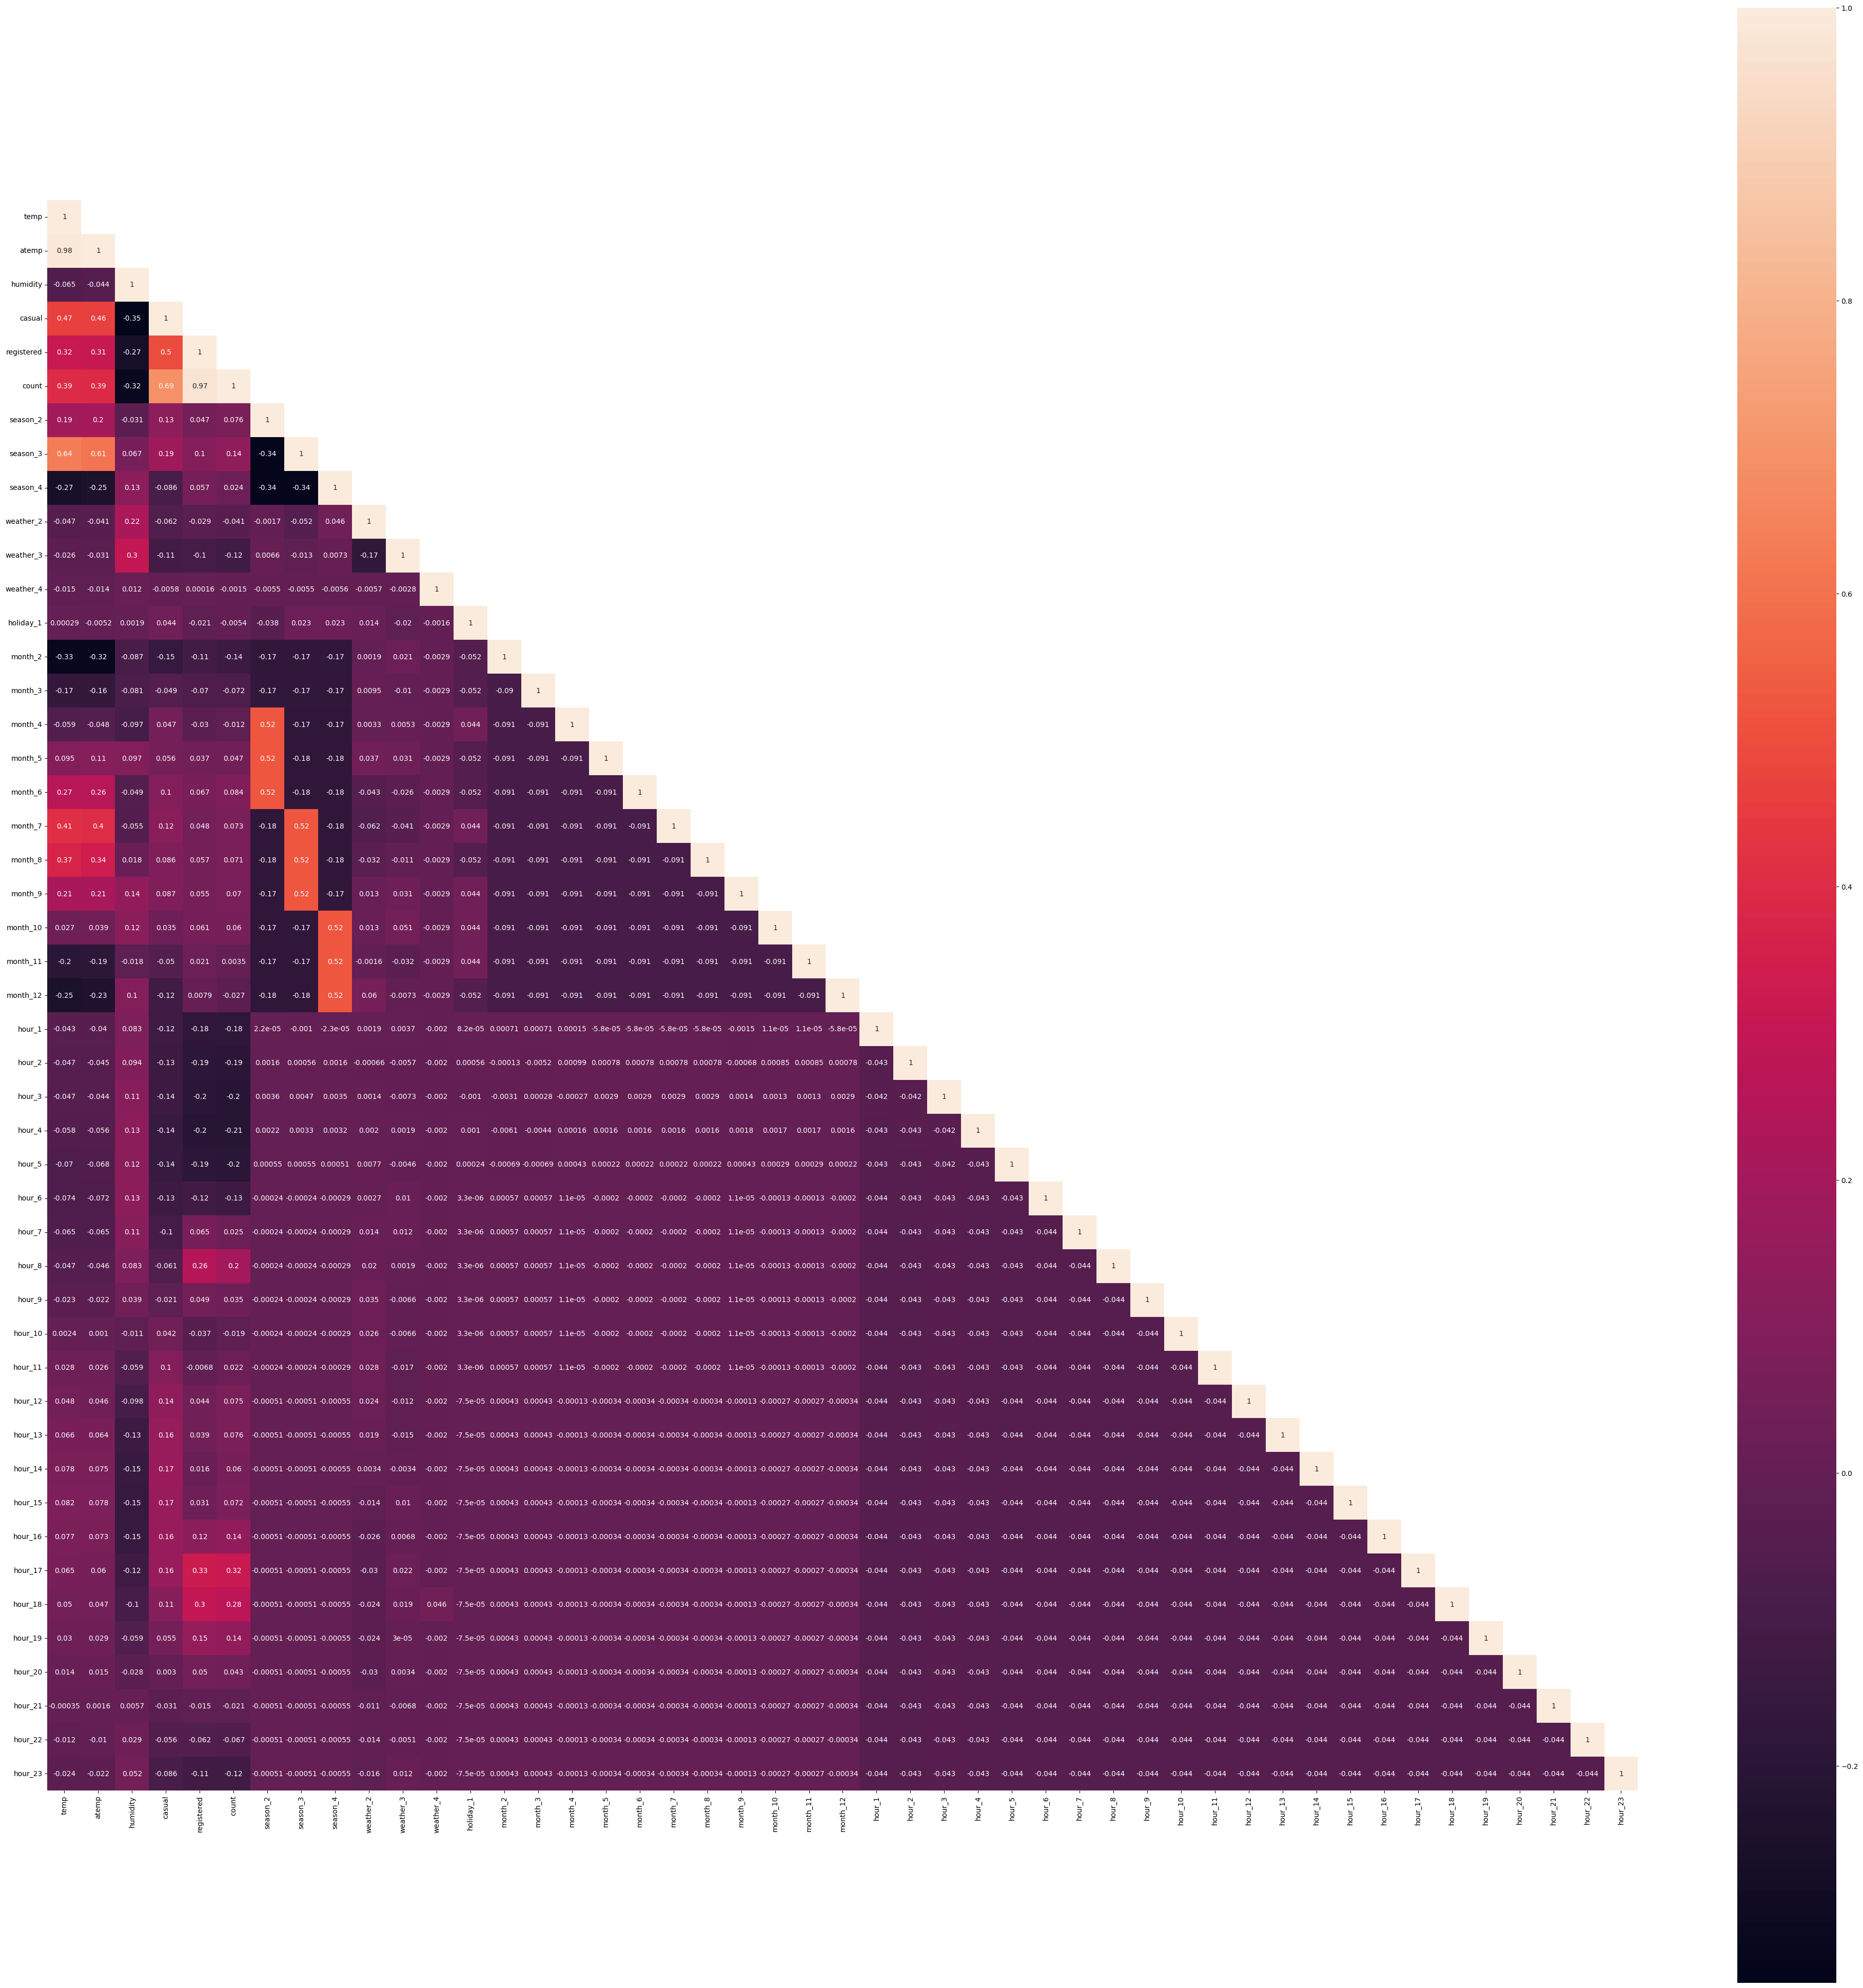

In [65]:
cor_mat= train_df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(50,50)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

### Splitting the data

In [66]:
X = train_df.drop('count',axis=1)

In [68]:
X.shape

(10886, 46)

In [69]:
y = np.log(train_df['count'])

In [70]:
y.shape

(10886,)

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

### Using Linear Regression

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
linear_rg = LinearRegression()

In [75]:
linear_rg.fit(X_train,y_train)

LinearRegression()

In [76]:
preds1 = linear_rg.predict(X_test)

In [77]:
preds1

array([5.77808376, 6.11276511, 6.13984011, ..., 5.72756265, 5.02227975,
       4.76513226])

In [78]:
from sklearn import metrics

r2_score is:0.8651534394123126
MAE: 0.3671198019290955
MSE: 0.30247531115678566
RMSE: 0.5499775551391035


<ipython-input-79-d51243435244>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-preds1)


<Axes: xlabel='count', ylabel='Density'>

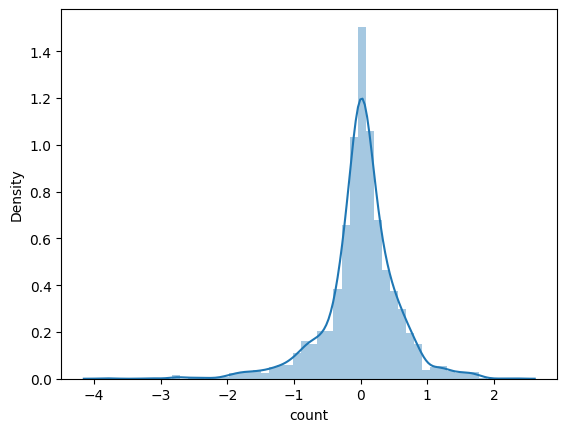

In [79]:
r2_score = metrics.r2_score(y_test,preds1)
print('r2_score is:{}'.format(r2_score))

print('MAE:',metrics.mean_absolute_error(y_test,preds1))
print('MSE:',metrics.mean_squared_error(y_test,preds1))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,preds1)))
sns.distplot(y_test-preds1)

#### Accuracy - 86.55%

### Using Decision Tree

In [80]:
from sklearn.tree import DecisionTreeRegressor

In [81]:
dt_rg = DecisionTreeRegressor(max_depth=5)

In [82]:
dt_rg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [83]:
preds2 = dt_rg.predict(X_test)

In [84]:
preds2

array([5.8072091 , 6.01211172, 6.34387146, ..., 5.61896195, 4.61558433,
       4.6631667 ])

r2_score is:0.9907788889478001
MAE: 0.11453445553124912
MSE: 0.020683941975010254
RMSE: 0.14381912937787605


<ipython-input-85-0711afa4999e>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-preds2)


<Axes: xlabel='count', ylabel='Density'>

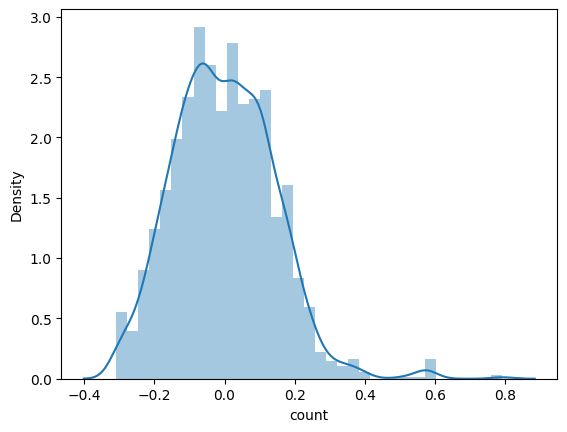

In [85]:
r2_score = metrics.r2_score(y_test,preds2)
print('r2_score is:{}'.format(r2_score))

print('MAE:',metrics.mean_absolute_error(y_test,preds2))
print('MSE:',metrics.mean_squared_error(y_test,preds2))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,preds2)))
sns.distplot(y_test-preds2)

#### Accuracy -  99.03%

### Using Hypertuned KNN

In [86]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [87]:
n_neighbors=[]
for i in range (0,50,5):
    if(i!=0):
        n_neighbors.append(i)
params_dict={'n_neighbors':n_neighbors,'n_jobs':[-1]}
clf_knn = GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_knn.fit(X_train,y_train)
preds3 = clf_knn.predict(X_test)

In [88]:
preds3

array([5.75600246, 6.03398818, 6.21379046, ..., 5.74266609, 4.71696158,
       4.64945172])

r2_score is:0.9937219449934415
MAE: 0.04764995532338001
MSE: 0.014082351327999773
RMSE: 0.11866908328625352


<ipython-input-89-c053551e62e3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-preds3)


<Axes: xlabel='count', ylabel='Density'>

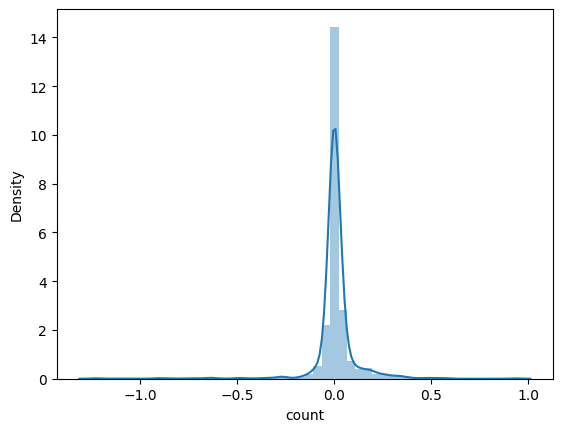

In [89]:
r2_score = metrics.r2_score(y_test,preds3)
print('r2_score is:{}'.format(r2_score))

print('MAE:',metrics.mean_absolute_error(y_test,preds3))
print('MSE:',metrics.mean_squared_error(y_test,preds3))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,preds3)))
sns.distplot(y_test-preds3)

#### Accuracy - 99.32%

### Using Hypertuned Random Forest

In [90]:
from sklearn.ensemble import RandomForestRegressor

In [91]:
no_of_test=[500]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf = GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_rf.fit(X_train,y_train)
preds4 = clf_rf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

In [92]:
preds4

array([5.7768618 , 6.03106978, 6.23877697, ..., 5.74314946, 4.72171903,
       4.66191573])

r2_score is:0.9999638337449726
MAE: 0.004953077761568518
MSE: 8.112479246888726e-05
RMSE: 0.00900693024669822


<ipython-input-93-2b64d931e68f>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-preds4)


<Axes: xlabel='count', ylabel='Density'>

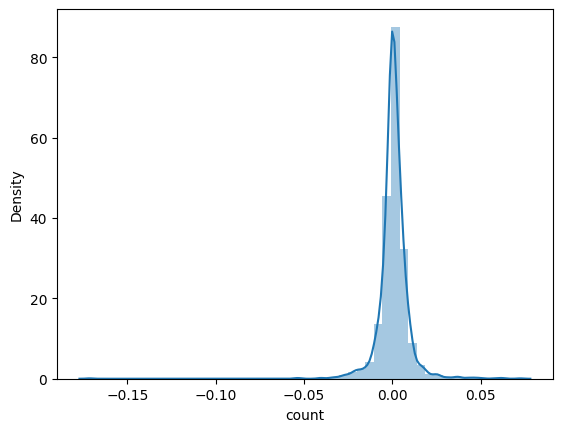

In [93]:
r2_score = metrics.r2_score(y_test,preds4)
print('r2_score is:{}'.format(r2_score))

print('MAE:',metrics.mean_absolute_error(y_test,preds4))
print('MSE:',metrics.mean_squared_error(y_test,preds4))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,preds4)))
sns.distplot(y_test-preds4)

#### Accuracy - 99.995%

### Using Hypertuned XGBoost

In [94]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [95]:
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }
    XGB = XGBRegressor()

    gridsearch = GridSearchCV(estimator = XGB,
                           param_grid = param_tuning,
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gridsearch.fit(X_train,y_train)

    return gridsearch.best_params

In [96]:
XGB = XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.5,
        learning_rate = 0.05,
        max_depth = 6,
        min_child_weight = 1,
        n_estimators = 1000,
        subsample = 0.7)

XGB.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test),(X_test,y_test)], verbose=False)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [97]:
preds5 = XGB.predict(X_test)

In [98]:
preds5

array([5.778542 , 5.980993 , 6.1737943, ..., 5.705216 , 4.7421393,
       4.6852098], dtype=float32)

r2_score is:0.9987396865778513
MAE: 0.03376381235918176
MSE: 0.0028270183003415348
RMSE: 0.05316971224617954


<ipython-input-99-613fabfac89c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-preds3)


<Axes: xlabel='count', ylabel='Density'>

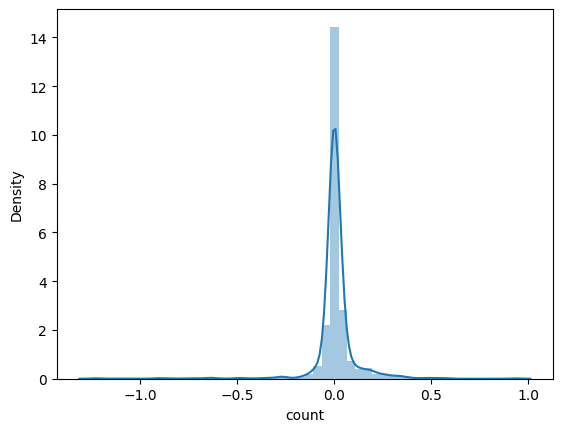

In [99]:
r2_score = metrics.r2_score(y_test,preds5)
print('r2_score is:{}'.format(r2_score))

print('MAE:',metrics.mean_absolute_error(y_test,preds5))
print('MSE:',metrics.mean_squared_error(y_test,preds5))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,preds5)))
sns.distplot(y_test-preds3)

#### Accuracy - 99.97%

## After performing the model comparative analysis we can conclude that almost all the models had an accuracy above 99% except the Linear Regressor. The Hypertuned Random Forest Regressor gave best result with 99.995% accuracy

### Saving the Hypertuned Random Forest Regressor and XGBoost Regressor models to get predictions from the test set.